In [5]:
import pandas as pd
from PIL import Image
import numpy as np

raw = pd.read_excel (r'./data/Book4.xlsx')
df = pd.DataFrame(raw, columns= ['TR20_01', 'TI20_01'])
df = df.iloc[1:]

In [2]:
import modules.rEYEkerAnalysis as rEYEker

(_data, _times, click_setting) = rEYEker.load_data_from_json("data/example.json")

In [3]:
image_rec = rEYEker.load_image("images/TR_Fibonacci.png")
image_iter = rEYEker.load_image("images/TI_Fibonacci.png")

In [15]:
click_data_rec = []
for _idx, item in df.iterrows():
    data_str = item[0]
    data_str = data_str.strip()
    coordinates_str = data_str.split(" ")
    coordinates = []
    for coordinate_str in coordinates_str:
        coordinate = coordinate_str.split("-")
        coordinate = (int(coordinate[0]), int(coordinate[1]))
        coordinates.append(coordinate)
    click_data_rec.append(coordinates)
    
click_data_iter = []
for _idx, item in df.iterrows():
    data_str = item[1]
    data_str = data_str.strip()
    coordinates_str = data_str.split(" ")
    coordinates = []
    for coordinate_str in coordinates_str:
        coordinate = coordinate_str.split("-")
        coordinate = (int(coordinate[0]), int(coordinate[1]))
        coordinates.append(coordinate)
    click_data_iter.append(coordinates)

In [16]:
def save_images(ims, prefix, extension):
    for idx, data in enumerate(ims):
        data = data*255
        data = np.uint8(data)
        im = Image.fromarray(data)
        im.save(prefix + str(idx) + extension)

In [21]:
ims_lines_rec = []
for data in click_data_rec:
    im = rEYEker.draw_vertical_line_diagram(image_rec, data, should_copy=True)
    ims_lines_rec.append(im)
    
ims_lines_iter = []
for data in click_data_iter:
    im = rEYEker.draw_vertical_line_diagram(image_iter, data, should_copy=True)
    ims_lines_iter.append(im)
    

In [22]:
save_images(ims_lines_rec, "./results/lines/TR20_01_", ".png")
save_images(ims_lines_iter, "./results/lines/TI20_01_", ".png")

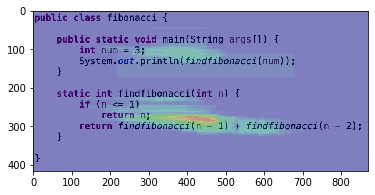

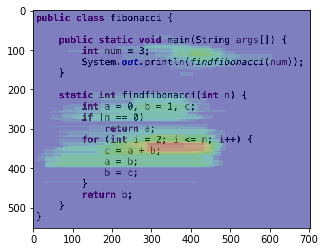

In [25]:
im_rec = rEYEker.draw_average_shape_heat_map_rel(image_rec, click_data_rec, click_setting, 1.0, .8, should_copy=True)
im_iter = rEYEker.draw_average_shape_heat_map_rel(image_iter, click_data_iter, click_setting, 1.0, .8, should_copy=True)
rEYEker.display(im_rec, normal_size=False)
rEYEker.display(im_iter, normal_size=False)

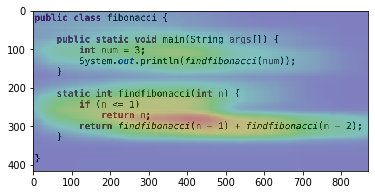

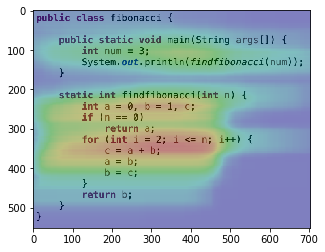

In [27]:
im_rec_100 = rEYEker.draw_average_shape_heat_map_abs(image_rec, click_data_rec, click_setting, 1.0, .0, should_copy=True)
im_iter_100 = rEYEker.draw_average_shape_heat_map_abs(image_iter, click_data_iter, click_setting, 1.0, .0, should_copy=True)
rEYEker.display(im_rec_100, normal_size=False)
rEYEker.display(im_iter_100, normal_size=False)

In [30]:
ims_iter = [im_iter_100, im_iter]
ims_rec = [im_rec_100, im_rec]
save_images(ims_rec, "./results/average_heat/Fib_Rec_", ".png")
save_images(ims_iter, "./results/average_heat/Fib_Iter_", ".png")